In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [69]:
y.size, X.shape

(178, (178, 13))

In [70]:
clf= DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [71]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz


dot_code = export_graphviz(clf) # feature_names=features
graph = pydot.graph_from_dot_data(dot_code) 
Image(graph[0].create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

In [72]:
import matplotlib as mpl
mpl.rc("figure", dpi=500)

[Text(1315.4605263157894, 1384.1666666666667, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(795.3947368421052, 1132.5, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(489.4736842105263, 880.8333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(244.73684210526315, 629.1666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(122.36842105263158, 377.5, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(367.10526315789474, 377.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(734.2105263157895, 629.1666666666667, 'X[9] <= 5.815\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(611.8421052631579, 377.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(856.578947368421, 377.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(1101.3157894736842, 880.8333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(978.9473684210526

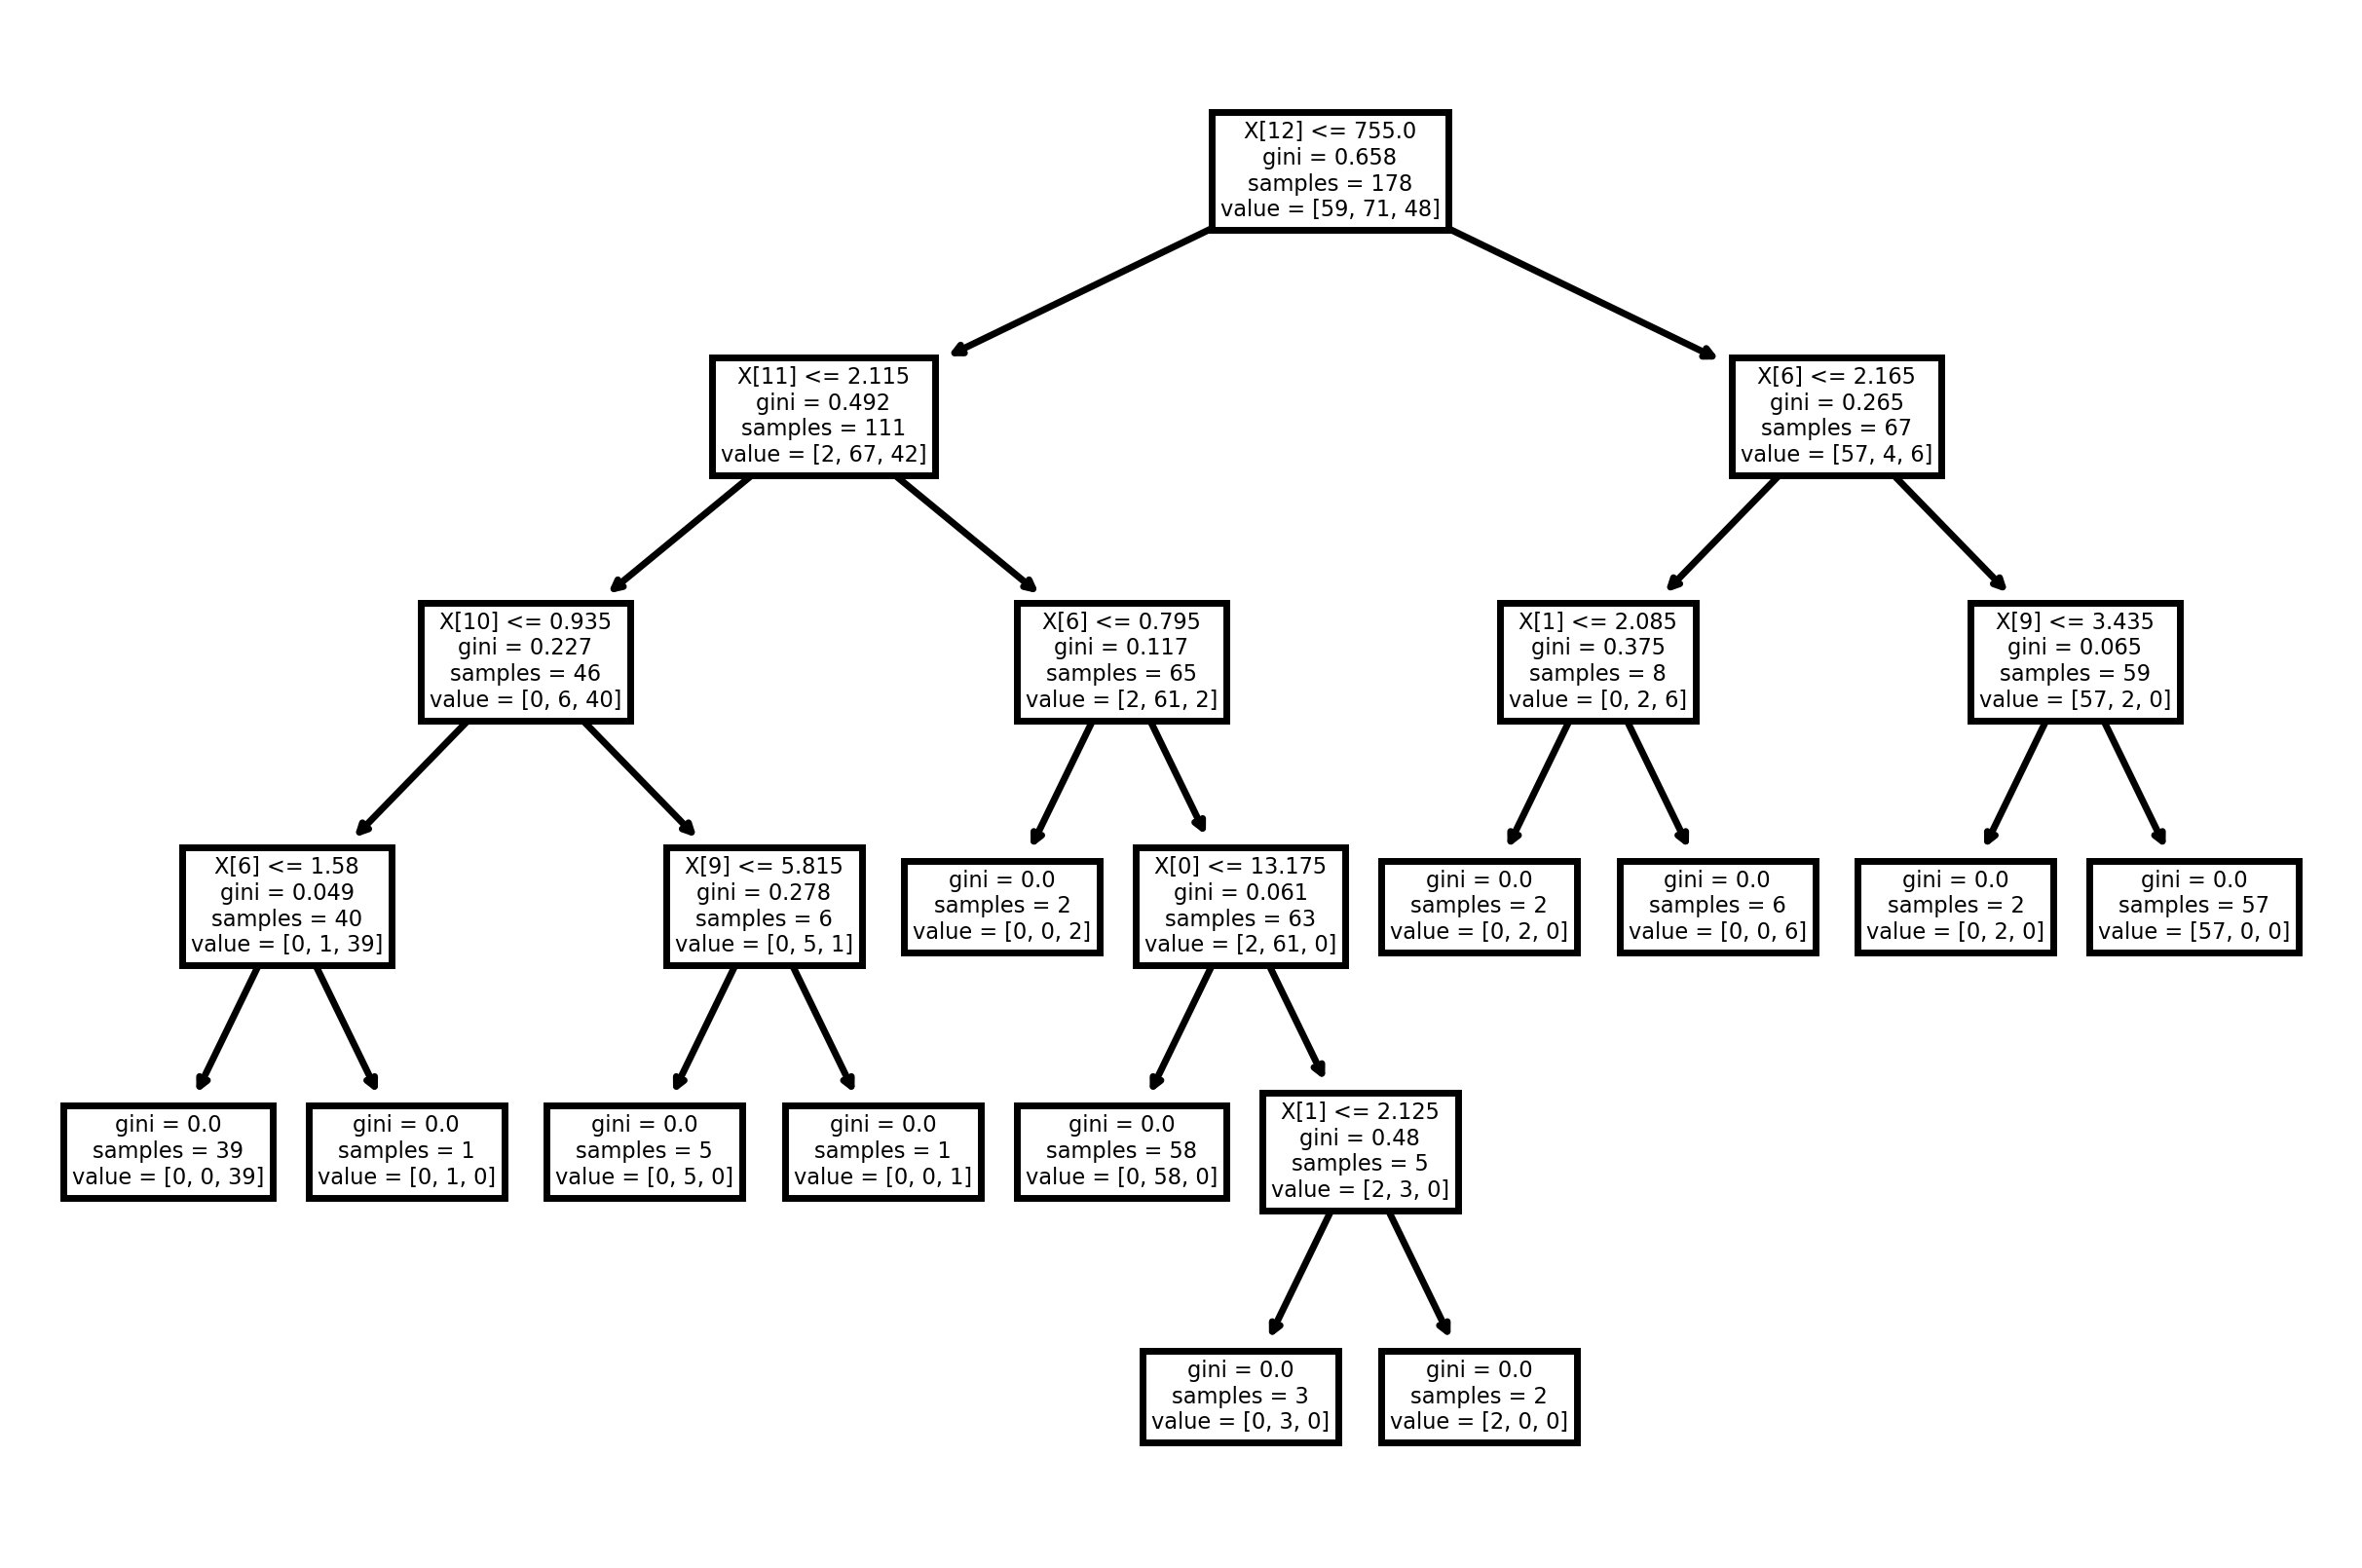

In [73]:
tree.plot_tree(clf)

In [74]:
y_p=clf.predict(X)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_p, y)

1.0

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)
clf1=DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred=clf1.predict(X_test)
accuracy_score(y_test, y_pred)


0.9166666666666666

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.87      0.90        15
           2       0.92      1.00      0.96        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [84]:
from sklearn.model_selection import ParameterGrid
params = {
       "max_depth": [None, 2, 4, 8],
       "splitter": ["best", "random"]
   }
acc_max=0
best_conf=[]
for config in ParameterGrid(params):
    print(config)
    clf=DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    acc_n=accuracy_score(y_test, y_pred)
    if acc_n>acc_max:
        best_conf=config
    print(acc_n)
print('Best Configuration: ', best_conf)

{'max_depth': None, 'splitter': 'best'}
0.9166666666666666
{'max_depth': None, 'splitter': 'random'}
0.9444444444444444
{'max_depth': 2, 'splitter': 'best'}
0.8888888888888888
{'max_depth': 2, 'splitter': 'random'}
0.8888888888888888
{'max_depth': 4, 'splitter': 'best'}
0.9166666666666666
{'max_depth': 4, 'splitter': 'random'}
0.9166666666666666
{'max_depth': 8, 'splitter': 'best'}
0.9444444444444444
{'max_depth': 8, 'splitter': 'random'}
0.9444444444444444
Best Configuration:  {'max_depth': 8, 'splitter': 'random'}


In [89]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation 
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases) 
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y,train_size=0.8) 
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
best_total_clf=DecisionTreeClassifier()
best_total_acc=0
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    acc_max=0
    best_clf=DecisionTreeClassifier()
    for config in ParameterGrid(params):
        print(config)
        clf=DecisionTreeClassifier(**config)
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_valid)
        acc_n=accuracy_score(y_valid, y_pred)
        if acc_n>acc_max:
            best_clf=clf
            acc_max=acc_n
        print(acc_n)
    if acc_max>best_total_acc:
        best_total_clf=best_clf
        best_total_acc=acc_max
print('Best Configuration: ', best_conf)

y_pred=best_total_clf.predict(X_test)
print(classification_report(y_test, y_pred))

{'max_depth': None, 'splitter': 'best'}
0.9310344827586207
{'max_depth': None, 'splitter': 'random'}
0.9310344827586207
{'max_depth': 2, 'splitter': 'best'}
0.8275862068965517
{'max_depth': 2, 'splitter': 'random'}
0.8275862068965517
{'max_depth': 4, 'splitter': 'best'}
0.9310344827586207
{'max_depth': 4, 'splitter': 'random'}
1.0
{'max_depth': 8, 'splitter': 'best'}
0.9310344827586207
{'max_depth': 8, 'splitter': 'random'}
0.896551724137931
{'max_depth': None, 'splitter': 'best'}
1.0
{'max_depth': None, 'splitter': 'random'}
0.8620689655172413
{'max_depth': 2, 'splitter': 'best'}
0.8620689655172413
{'max_depth': 2, 'splitter': 'random'}
0.6896551724137931
{'max_depth': 4, 'splitter': 'best'}
0.9310344827586207
{'max_depth': 4, 'splitter': 'random'}
0.7931034482758621
{'max_depth': 8, 'splitter': 'best'}
0.9310344827586207
{'max_depth': 8, 'splitter': 'random'}
0.9310344827586207
{'max_depth': None, 'splitter': 'best'}
0.8214285714285714
{'max_depth': None, 'splitter': 'random'}
0.8928